# Coursework TensorFlow
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:

- Make sure you use a python environment using the `requirements.txt` files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but only provide your answers in the spaces given.
- Do not add or change code in the cells other than the ones marked with `# YOUR CODE HERE`.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from `sklearn` or `tensorflow`.
- Always label your plots.
- Answer the questions concisely and show your work/derivations/reasoning.

**Please rename the notebook filename to include your candidate number in the filename. And please also add your candidate number below:**

In [1]:
CANDIDATE_NUMBER = "MCMQ7"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

2025-03-20 22:24:16.798627: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 22:24:16.801652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-20 22:24:16.811341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742509456.827236  468842 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742509456.832323  468842 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 22:24:16.848642: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [4]:
# Load data
data = tfds.load('tf_flowers', split=["train"], as_supervised=True)

W0000 00:00:1742509459.195582  468842 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips",  "sunflowers", "roses"]

2025-03-20 22:24:19.295704: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-20 22:24:20.423168: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

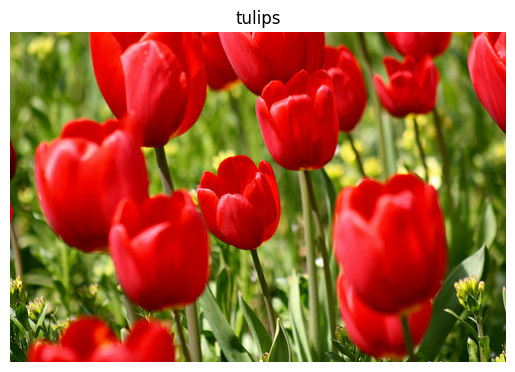

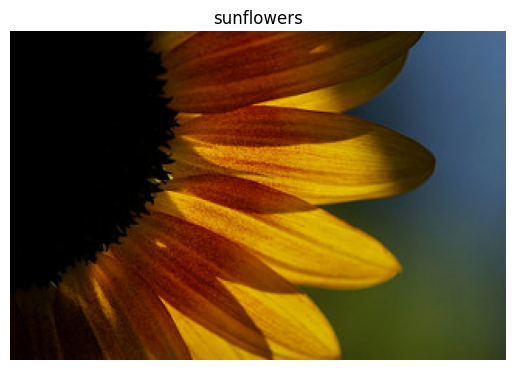

In [6]:
def show_image(image, target):
    # YOUR CODE HERE

    # Plot each image in a separate figure
    plt.figure()
    
    # Plot their classes
    # Set the title of the images to be the class the image belongs to
    label = labels[target]
    
    plt.imshow(image)
    plt.axis("off")
    plt.title(label)
    #raise NotImplementedError()

for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

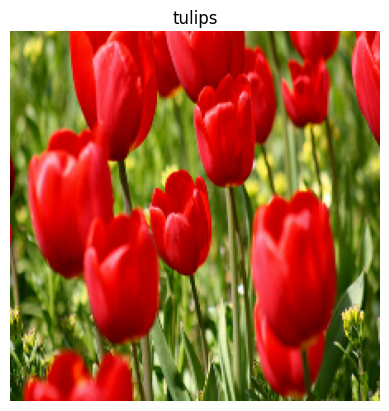

In [7]:
def rescale_and_resize(image):
    # YOUR CODE HERE
    
    # Rescale to (0, 1) range
    preprocessed_image = image / 255
    
    # Resize to (224, 244)
    preprocessed_image = tf.image.resize(preprocessed_image, [224, 224])
    
    return preprocessed_image
    #raise NotImplementedError()

show_image(rescale_and_resize(images[0]), targets[0])

In [8]:
check_var_defined('rescale_and_resize')

rescale_and_resize defined.


_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [9]:
# YOUR CODE HERE
images_preprocessed = np.array([rescale_and_resize(img) for img in images])
#raise NotImplementedError()

In [10]:
check_var_defined('images_preprocessed')
assert type(images_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

images_preprocessed defined.


One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [11]:
def one_hot_encoding(target):
    # YOUR CODE HERE
    v = np.zeros(len(labels))
    v[target] = 1
    return v
    #raise NotImplementedError()

print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

target: 2, encoding: [0. 0. 1. 0. 0.]


_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [12]:
# YOUR CODE HERE
targets_preprocessed = np.array([one_hot_encoding(t) for t in targets])
#raise NotImplementedError()

In [13]:
check_var_defined('targets_preprocessed')
assert type(targets_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

targets_preprocessed defined.


In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

The training dataset is for initially fitting the models to the data.

The test dataset is for performing final, unbiased verification of the model once training is complete.

The validation set is somewhat of a halfway point between the two. It is used for tuning the model while training, for example by detecting overfitting.  Overfitting can be detected by measuring the model's error on the validation set per epoch. If the validation error increases between epochs, the model could be overfitting and this can be used to stop the training early before it gets worse.

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [14]:
tf.keras.utils.set_random_seed(371947)
# YOUR CODE HERE
length = len(images_preprocessed)
x_train, x_val, x_test = np.split(images_preprocessed, [int(length*.8), int(length*.9)])
y_train, y_val, y_test = np.split(targets_preprocessed, [int(length*.8), int(length*.9)])
#raise NotImplementedError()

print(f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}")

Train samples: 2936, Validation samples: 367, Test samples: 367


In [15]:
check_var_defined('x_train')
check_var_defined('y_train')

check_var_defined('x_val')
check_var_defined('y_val')

check_var_defined('x_test')
check_var_defined('y_test')

x_train defined.
y_train defined.
x_val defined.
y_val defined.
x_test defined.
y_test defined.


WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [16]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

A common problem with activation functions is that of vanishing gradients in lower layers, when gradients become very small and cease to be updated in training, or exploding gradients, in which case the training algorithm may not converge. We use different activation functions to avoid this problem. The choice of activation function depends on multiple factors, one of which is whether the data has negative values or not. In our case, it does not - we normalised the data into the range (0, 1)

The convolutional layer should use a ReLU activation function to prevent vanishing gradients, as the function's gradient is never zero for positive values.

The dense layer should also use ReLU, for the same reason as the convolutional layer. It could use Tanh if negative values were present.

The activation function for the output layer depends on the problem type. In our case we are doing multi-class classification, so we should use Softmax to map predictions to probabilities The probabilities for each class will sum to 1.

_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [17]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

# YOUR CODE HERE
model_basic = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

#raise NotImplementedError()

/home/ktyl/.conda/envs/mlbd/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
check_var_defined('model_basic')

model_basic defined.


To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

Categorical Cross-Entropy (CCE) is an appropriate loss function because we are using one-hot encoding and the softmax looss function. One-hot encoding works well with the softmax activation function as we are comparing probabilities and one-hot produces a multi-dimensional vector.

We can measure categorial accuracy as a metric since the dataset is one-hot encodded and relatively balanced. The metric measures the proportion of predictions matching one-hot labels.

Now compile the model using the `Adam` optimiser (with a `learning_rate` of 1e-4), your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [19]:
# YOUR CODE HERE
model_basic.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
#raise NotImplementedError()

In [20]:
check_var_defined('model_basic')

model_basic defined.


_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [21]:
tf.keras.utils.set_random_seed(47290)
# YOUR CODE HERE
history_basic = model_basic.fit(x_train, y_train, epochs=10,
                                validation_data=(x_val, y_val),
                                batch_size=32)
#raise NotImplementedError()

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - categorical_accuracy: 0.3034 - loss: 1.5835 - val_categorical_accuracy: 0.3842 - val_loss: 1.4783
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - categorical_accuracy: 0.4216 - loss: 1.3884 - val_categorical_accuracy: 0.4741 - val_loss: 1.3093
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - categorical_accuracy: 0.4820 - loss: 1.2396 - val_categorical_accuracy: 0.4932 - val_loss: 1.2155
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - categorical_accuracy: 0.5169 - loss: 1.1568 - val_categorical_accuracy: 0.4932 - val_loss: 1.1751
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - categorical_accuracy: 0.5300 - loss: 1.1089 - val_categorical_accuracy: 0.5177 - val_loss: 1.1498
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - categorical_accuracy: 0.5450 - loss: 1.0736 - val_categorical_accuracy: 0.5259 - val_loss: 1.1298
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - categorical_accuracy: 0.563

In [22]:
check_var_defined('history_basic')

history_basic defined.


_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

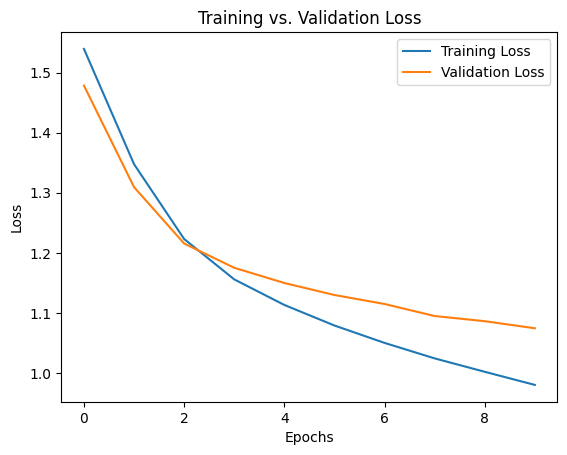

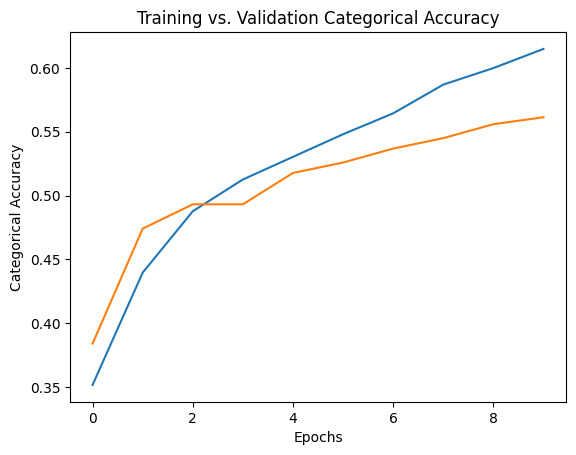

In [23]:
def plot_metrics(history):
    # YOUR CODE HERE
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    
    plt.figure()
    plt.plot(history.history['categorical_accuracy'], label='Categorical Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Accuracy')
    plt.title('Training vs. Validation Categorical Accuracy')
    
    plt.show()
    #raise NotImplementedError()
    
plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

The loss decreased over time and the accuracy increased as desired. However in both cases the effect was greater for the training data than for the validation set.

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

The difference between the training and validation sets for the loss and accuracy would increase. This would imply overfitting of the model as it becomes increasingly better at predicting samples from the training set than the validation set.

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [24]:
def model_predict(model, x):
    # YOUR CODE HERE
    predicted_targets_one_hot = model.predict(x)
    predicted_targets = np.array([np.where(one_hot==np.max(one_hot))[0][0] for one_hot in predicted_targets_one_hot])
    #raise NotImplementedError()
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [25]:
# YOUR CODE HERE
test_targets = np.array([np.where(one_hot==1)[0][0] for one_hot in y_test])
test_targets_basic = np.array(model_predict(model_basic, x_test))
#raise NotImplementedError()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step 


In [26]:
check_var_defined('test_targets')
check_var_defined('test_targets_basic')

assert test_targets.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"
assert test_targets_basic.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"

test_targets defined.
test_targets_basic defined.


_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [27]:
def average_recall_precision(y, y_predict):
    # YOUR CODE HERE

    precision = 0
    recall = 0
    
    classes = set(y)
    
    for c in classes:
        true_positives = 0
        false_positives = 0
        false_negatives = 0

        for truth, prediction in zip(y, y_predict):

            # Element is irrelevant for this class
            if truth != c and prediction != c:
                continue

            if truth == prediction:
                true_positives += 1
            elif truth == c:
                false_negatives += 1
            elif prediction == c:
                false_positives += 1

        
        precision_class = true_positives / (true_positives + false_positives) 
        recall_class = true_positives / (true_positives + false_negatives)
        
        precision += precision_class
        recall += recall_class
    
    precision /= len(classes)
    recall /= len(classes)
    
    #raise NotImplementedError()

    print(f"Average Recall: {recall:.3f}, Average Precision {precision:0.3f}")
    return recall, precision

recall_basic, precision_basic = average_recall_precision(test_targets, test_targets_basic)

Average Recall: 0.618, Average Precision 0.642


In [28]:
check_var_defined('recall_basic')
check_var_defined('precision_basic')

recall_basic defined.
precision_basic defined.


_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

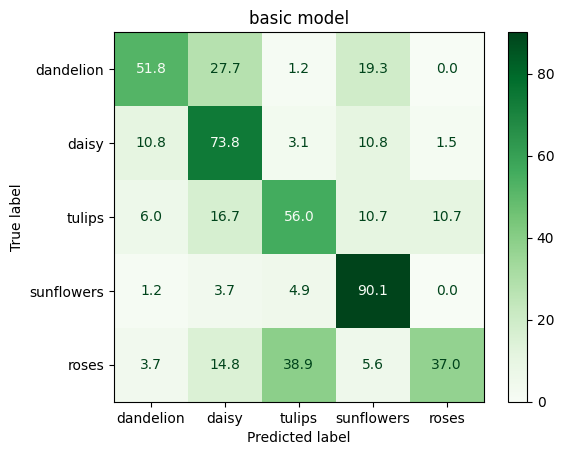

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y, y_pred, title=""):
    # YOUR CODE HERE
    cm = confusion_matrix(y, y_pred, normalize="true") * 100
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display.plot(cmap="Greens", values_format=".1f")
    #raise NotImplementedError()
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

The average recall and precision are balanced, suggesting the model is equally good at minimising false positives as false negatives. Some information is lost in these averages, as we can see from the confusion matrix that the model performs much better for the sunflowers class as for the others with >92% accuracy. Roses are frequently misidentified as tulips, suggesting the model's precision for roses may be low.

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

Dropout layers set a random amount of the training data to zero in each epoch, forcing the model to generalise by providing effectively different training data each time. It becomes harder for the model to fit specifically to instances in the training data because it cannot see all of the training data at once.

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

Data augmentation is the process of applying small variations to the training data, for example rotating, cropping, flipping training or slightly altering the colours. This similarly limits the model's ability to fit specifically to the training data as it is operating on a modified version, instead of the training data itself, forcing it to generalise.

_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [30]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

# YOUR CODE HERE
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.RandomZoom(0.1, seed=42),
    tf.keras.layers.RandomRotation(0.1, seed=42),
    tf.keras.layers.RandomFlip("horizontal", seed=42),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation="softmax")
])

#raise NotImplementedError()

/home/ktyl/.conda/envs/mlbd/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
check_var_defined('model_dropout')
model_dropout.summary()

model_dropout defined.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_zoom (RandomZoom)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
tf.keras.utils.set_random_seed(103745)
# YOUR CODE HERE
model_dropout.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history_dropout = model_dropout.fit(x_train, y_train, epochs=20,
                                    validation_data=(x_val, y_val),
                                    batch_size=32)
#raise NotImplementedError()

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - categorical_accuracy: 0.2455 - loss: 1.6014 - val_categorical_accuracy: 0.2916 - val_loss: 1.5391
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - categorical_accuracy: 0.3000 - loss: 1.5297 - val_categorical_accuracy: 0.3379 - val_loss: 1.4781
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - categorical_accuracy: 0.3400 - loss: 1.4764 - val_categorical_accuracy: 0.3515 - val_loss: 1.4463
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - categorical_accuracy: 0.3607 - loss: 1.4422 - val_categorical_accuracy: 0.4278 - val_loss: 1.3648
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - categorical_accuracy: 0.3780 - loss: 1.3957 - val_categorical_accuracy: 0.4741 - val_loss: 1.3091
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - categorical_accuracy: 0.4264 - loss: 1.3473 - val_categorical_accuracy: 0.5041 - val_loss: 1.2634
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - categorical_accuracy: 0.435

_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [33]:
check_var_defined('history_dropout')

history_dropout defined.


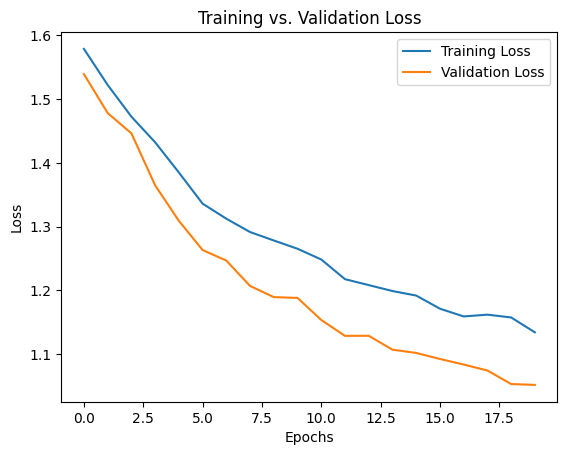

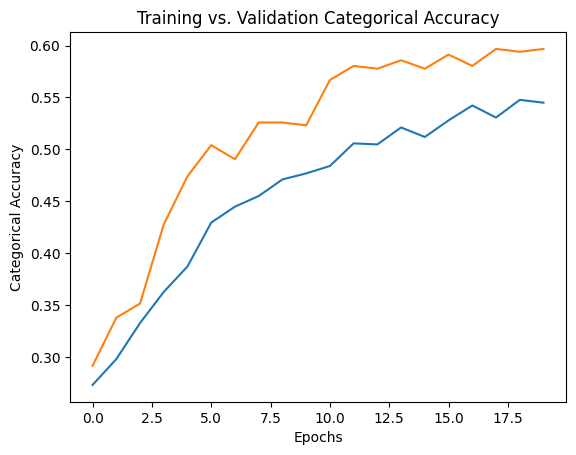

In [34]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

While the accuracy is lower and the loss higher than the basic model despite more time training, we can see from the plots that the training and validation loss and accuracy diverge much more slowly. This suggests the model is less susceptible to overfitting, so we are likely to get a better model with more training.

_Why did we have to train the model for more epochs than the basic model?_

Each epoch has less training data to work from, so the model takes longer to learn class features with the same learning rate.

Now we evaluate our model on the test set using the functions you wrote before

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step 
Average Recall: 0.685, Average Precision 0.682


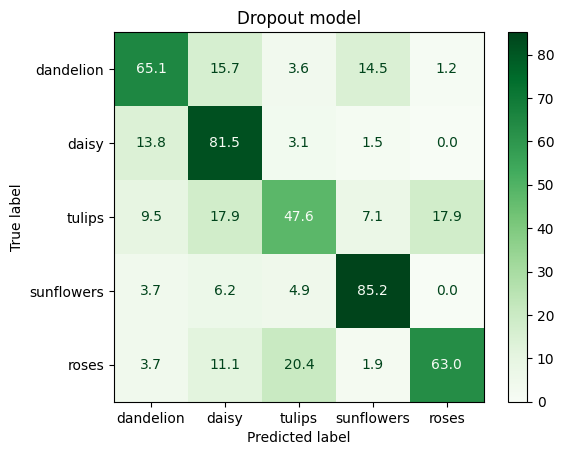

In [35]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(test_targets, test_targets_dropout)    
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [36]:
check_var_defined('test_targets_dropout')
check_var_defined('recall_dropout')

test_targets_dropout defined.
recall_dropout defined.


In [37]:
check_var_defined('test_targets_dropout')
check_var_defined('precision_dropout')

test_targets_dropout defined.
precision_dropout defined.


_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

The model is more precise and has better recall than the previous model, as we  can see by a lower proportion of misidentifications for example mistaking roses for tulips as before. However, the difference is not enormous - more training may yield better results.

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

Transfer learning allows us to use a pre-trained model which saves time by using weights that have already been found and reduces overfitting as the model will be more general than our dataset. 

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [38]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)

for layer in mobilenet.layers:
   layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

Output shape of the MobileNet:  (None, 7, 7, 1024)


_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [39]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

# YOUR CODE HERE
model_mobilenet = tf.keras.models.Sequential([
    mobilenet,
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation="softmax")
])

#raise NotImplementedError()

In [40]:
check_var_defined('model_mobilenet')
model_mobilenet.summary()

model_mobilenet defined.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,523,973 (13.44 MB)

 Trainable params: 295,109 (1.13 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

*Train the model in the same way as before, for 10 epochs.*

In [41]:
tf.keras.utils.set_random_seed(9673)
# YOUR CODE HERE
model_mobilenet.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history_mobilenet = model_mobilenet.fit(x_train, y_train, epochs=10,
                                    validation_data=(x_val, y_val),
                                    batch_size=32)
#raise NotImplementedError()

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 429ms/step - categorical_accuracy: 0.2296 - loss: 2.5558 - val_categorical_accuracy: 0.4741 - val_loss: 1.2791
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - categorical_accuracy: 0.4566 - loss: 1.2256 - val_categorical_accuracy: 0.7193 - val_loss: 0.8473
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 419ms/step - categorical_accuracy: 0.6146 - loss: 0.9444 - val_categorical_accuracy: 0.7956 - val_loss: 0.6352
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 462ms/step - categorical_accuracy: 0.6761 - loss: 0.7756 - val_categorical_accuracy: 0.8501 - val_loss: 0.5471
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - categorical_accuracy: 0.7207 - loss: 0.6936 - val_categorical_accuracy: 0.8365 - val_loss: 0.4774
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 420ms/step - categorical_accuracy: 0.7470 - loss: 0.6032 - val_categorical_accuracy: 0.8638 - val_loss: 0.4606
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 417ms/step - categorical_accuracy: 0.769

In [42]:
check_var_defined('history_mobilenet')

history_mobilenet defined.


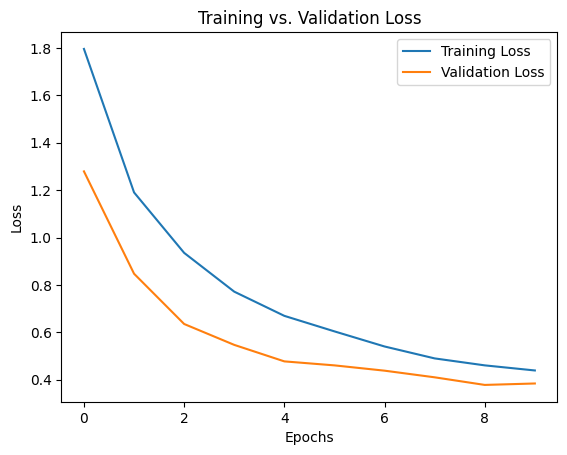

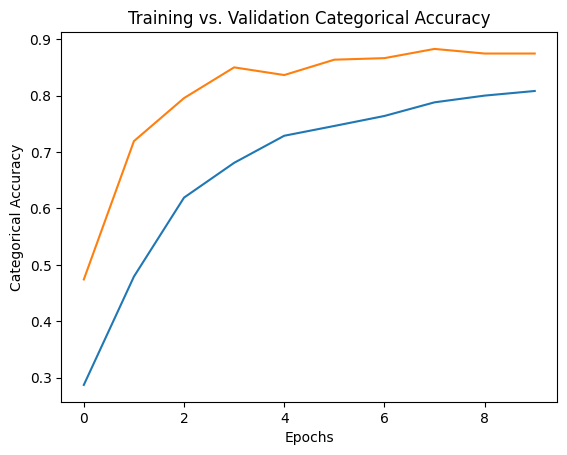

In [43]:
plot_metrics(history_mobilenet)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step
Average Recall: 0.885, Average Precision 0.881


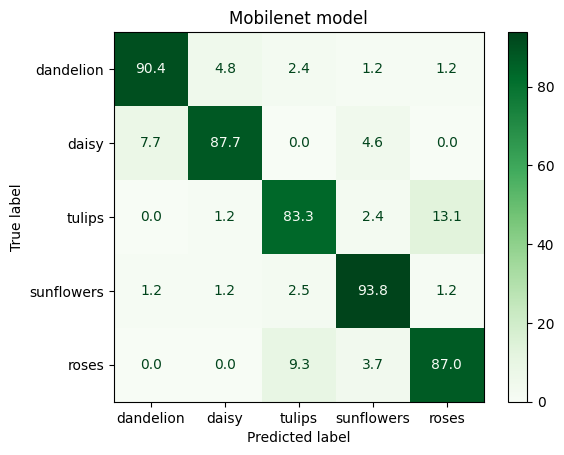

In [44]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(test_targets, test_targets_mobilenet)    
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [45]:
check_var_defined('test_targets_mobilenet')
check_var_defined('recall_mobilenet')


test_targets_mobilenet defined.
recall_mobilenet defined.


In [46]:
check_var_defined('precision_mobilenet')


precision_mobilenet defined.


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

The initial accuracy started lower and the loss higher than with the other models. However, the transfer model was able to learn much more quickly and overtook the other models within a few generations. The average precision and recall are significantly better, and it can be seen from the confusion matrix that there was a much lower proportion of misclassification, with the model being very good at positive classification.

_Suggest some ways the model could be improved further._

As always, more training data and more tranining time would improve the results. Learning reate scheduling to reduce the learning rate during training could allow for faster convergence of the model. Different optimisation functions from Adam could also improve results. A deeper model architecture could allow for more nuanced features to be learned.